datasource link https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS

columns descriptions https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html

# Load up the data and check head

In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/PS_2026.02.11_20.11.59.csv", comment="#")



In [2]:
df.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007.0,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007.0,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
2,11 Com b,11 Com,0,2,1,Radial Velocity,2007.0,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009.0,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009.0,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23


## Basic assessment of data 

In [3]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39315 entries, 0 to 39314
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          39315 non-null  object 
 1   hostname         39315 non-null  object 
 2   default_flag     39315 non-null  int64  
 3   sy_snum          39315 non-null  int64  
 4   sy_pnum          39315 non-null  int64  
 5   discoverymethod  39315 non-null  object 
 6   disc_year        39313 non-null  float64
 7   disc_facility    39315 non-null  object 
 8   soltype          39315 non-null  object 
 9   pl_controv_flag  39315 non-null  int64  
 10  pl_refname       39315 non-null  object 
 11  pl_orbper        35977 non-null  float64
 12  pl_orbpererr1    34275 non-null  float64
 13  pl_orbpererr2    34274 non-null  float64
 14  pl_orbperlim     35977 non-null  float64
 15  pl_orbsmax       21985 non-null  float64
 16  pl_orbsmaxerr1   7519 non-null   float64
 17  pl_orbsmaxer

## Get dataframes ready for assessing relationship between mass and controversy in journals

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keep only rows with mass and controversy flag
df_mass = df[['pl_bmasse', 'pl_controv_flag']].dropna()

# Remove zero or negative masses (just in case)
df_mass = df_mass[df_mass['pl_bmasse'] > 0]

df_mass.head()

,pl_bmasse,pl_controv_flag
0,4914.898486,0
1,6165.600000,0
2,5434.700000,0
3,4684.814200,0
4,3432.400000,0


In [5]:
df['pl_controv_flag'].value_counts()

pl_controv_flag
0    39193
1      122
Name: count, dtype: int64

Isolate clean data

In [6]:
df_mass = df[['pl_bmasse', 'pl_controv_flag']].dropna()
df_mass = df_mass[df_mass['pl_bmasse'] > 0]

### check the shape of the dataframe

In [7]:
df_mass.shape

(7134, 2)

In [8]:
df_mass.groupby('pl_controv_flag')['pl_bmasse'].describe()

,count,mean,std,min,25%,50%,75%,max
pl_controv_flag,,,,,,,,
0,7069.0,744.795385,1564.924960,0.015,13.60000,193.55847,689.660000,25426.400000
1,65.0,517.475987,1134.037125,0.440,7.72323,13.60000,622.943678,7923.462187


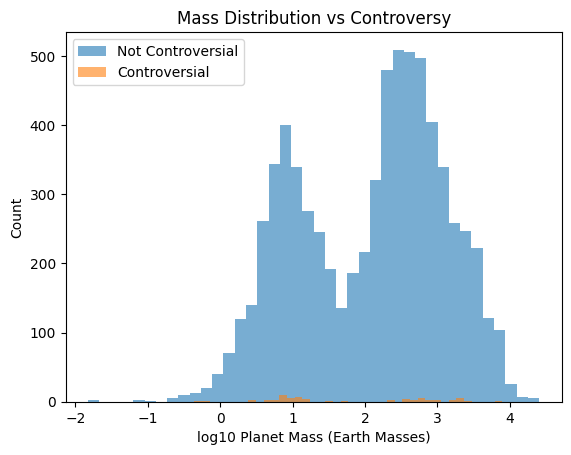

In [9]:
import numpy as np
import matplotlib.pyplot as plt

controversial = df_mass[df_mass['pl_controv_flag'] == 1]
not_controversial = df_mass[df_mass['pl_controv_flag'] == 0]

plt.hist(np.log10(not_controversial['pl_bmasse']), bins=40, alpha=0.6, label='Not Controversial')
plt.hist(np.log10(controversial['pl_bmasse']), bins=40, alpha=0.6, label='Controversial')

plt.xlabel("log10 Planet Mass (Earth Masses)")
plt.ylabel("Count")
plt.legend()
plt.title("Mass Distribution vs Controversy")
plt.show()

C:\Users\super\AppData\Local\Temp\ipykernel_37252\630705424.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_prob = df_mass.groupby('mass_bin')['pl_controv_flag'].mean()


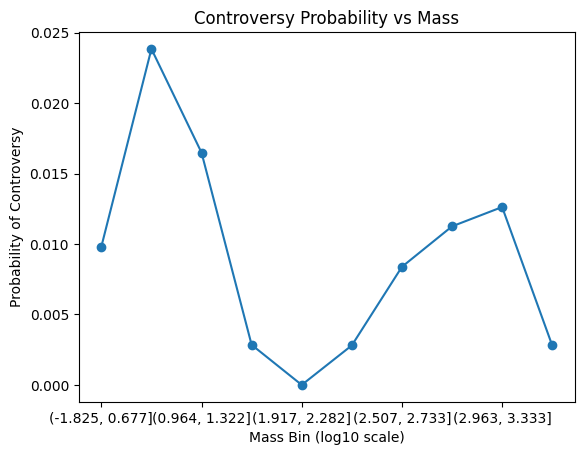

In [10]:
df_mass['log_mass'] = np.log10(df_mass['pl_bmasse'])

df_mass['mass_bin'] = pd.qcut(df_mass['log_mass'], q=10)

bin_prob = df_mass.groupby('mass_bin')['pl_controv_flag'].mean()

bin_prob.plot(marker='o')
plt.xlabel("Mass Bin (log10 scale)")
plt.ylabel("Probability of Controversy")
plt.title("Controversy Probability vs Mass")
plt.show()

_Checked mass vs controversy. No correlation._

Hypothesis Testing: Investigated whether planet mass predicts likelihood of scientific controversy.

Log-transformed skewed mass distribution.

Computed controversy probability across mass quantiles.

Modeled binary outcome using logistic regression.

Found no strong predictive relationship between mass alone and controversy status.

Concluded that controversy likely depends on detection method or measurement uncertainty rather than mass magnitude.

## Gauge a metric of uncertainty concerning the masses of the exoplanets

In [11]:
df['mass_rel_uncertainty'] = (
    (df['pl_bmasseerr1'].abs() + df['pl_bmasseerr2'].abs()) / 2
) / df['pl_bmasse']

df['mass_rel_uncertainty'].describe()

count    6470.000000
mean        0.216534
std         0.277109
min         0.000000
25%         0.065749
50%         0.122449
75%         0.250000
max         6.224638
Name: mass_rel_uncertainty, dtype: float64

In [12]:
df.sort_values('mass_rel_uncertainty', ascending=False).head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,mass_rel_uncertainty
27657,Kepler-47 b,Kepler-47,1,2,3,Transit,2012.0,Kepler,Published Confirmed,0,...,13.535,0.041,-0.041,15.1626,0.000690,-0.000690,2019-04-22,2019-05,2019-04-25,6.224638
10703,Kepler-126 c,Kepler-126,0,1,3,Transit,2014.0,Kepler,Published Confirmed,0,...,9.344,0.011,-0.011,10.4540,0.000361,-0.000361,2024-02-21,2024-01,2024-02-21,5.496827
25366,Kepler-36 b,Kepler-36,0,1,2,Transit,2012.0,Kepler,Published Confirmed,0,...,10.788,0.022,-0.022,12.0767,0.000170,-0.000170,2024-02-21,2024-01,2024-02-21,3.474449
8336,Kepler-109 c,Kepler-109,0,1,2,Transit,2014.0,Kepler,Published Confirmed,0,...,11.001,0.017,-0.017,12.2955,0.000137,-0.000137,2024-02-21,2024-01,2024-02-21,3.322326
19871,Kepler-203 d,Kepler-203,0,1,3,Transit,2014.0,Kepler,Published Confirmed,0,...,12.445,0.026,-0.026,13.9421,0.000254,-0.000254,2014-05-28,2014-05,2014-05-28,3.194690


In [13]:
df_unc = df[['mass_rel_uncertainty', 'pl_controv_flag']].dropna()

df_unc.groupby('pl_controv_flag')['mass_rel_uncertainty'].describe()

,count,mean,std,min,25%,50%,75%,max
pl_controv_flag,,,,,,,,
0,6411.0,0.216654,0.276728,0.000000,0.065373,0.123134,0.250000,6.224638
1,59.0,0.203518,0.318219,0.009479,0.075246,0.107113,0.174955,2.218747


## Is unable to find any correlation between mass relative uncertainties and controversy 

# Now begins a multidimensional analysis to discovery what correlates with controversy 

In [14]:
import numpy as np
import pandas as pd

# Columns we want (only keep those that actually exist)
cols = ['pl_controv_flag', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
        'pl_orbper', 'pl_rade', 'discoverymethod']

missing = [c for c in cols if c not in df.columns]
print("Missing columns:", missing)

dfm = df[[c for c in cols if c in df.columns]].copy()

# Basic cleaning: keep target present
dfm = dfm.dropna(subset=['pl_controv_flag'])

# Keep positive values where needed
if 'pl_bmasse' in dfm: dfm = dfm[dfm['pl_bmasse'].isna() | (dfm['pl_bmasse'] > 0)]
if 'pl_orbper' in dfm: dfm = dfm[dfm['pl_orbper'].isna() | (dfm['pl_orbper'] > 0)]
if 'pl_rade' in dfm: dfm = dfm[dfm['pl_rade'].isna() | (dfm['pl_rade'] > 0)]

Missing columns: []


In [15]:
# Relative mass uncertainty (only where we have all three)
if {'pl_bmasse','pl_bmasseerr1','pl_bmasseerr2'}.issubset(dfm.columns):
    dfm['mass_rel_uncertainty'] = (
        (dfm['pl_bmasseerr1'].abs() + dfm['pl_bmasseerr2'].abs()) / 2
    ) / dfm['pl_bmasse']
else:
    dfm['mass_rel_uncertainty'] = np.nan

# Logs (help with skew)
dfm['log_mass'] = np.log10(dfm['pl_bmasse']) if 'pl_bmasse' in dfm else np.nan
dfm['log_orbper'] = np.log10(dfm['pl_orbper']) if 'pl_orbper' in dfm else np.nan

# Optional: cap ridiculous uncertainty to reduce outlier domination
dfm['mass_rel_uncertainty'] = dfm['mass_rel_uncertainty'].clip(upper=3)

In [16]:
feature_cols = []
for c in ['log_mass','mass_rel_uncertainty','log_orbper','pl_rade','discoverymethod']:
    if c in dfm.columns:
        feature_cols.append(c)

model_df = dfm[['pl_controv_flag'] + feature_cols].dropna()
model_df['pl_controv_flag'] = model_df['pl_controv_flag'].astype(int)

print(model_df['pl_controv_flag'].value_counts())
model_df.head()

pl_controv_flag
0    2926
1      12
Name: count, dtype: int64


,pl_controv_flag,log_mass,mass_rel_uncertainty,log_orbper,pl_rade,discoverymethod
109,0,0.922725,0.045400,-0.132800,2.173,Radial Velocity
112,0,0.933993,0.050058,-0.132799,1.947,Radial Velocity
114,0,0.888741,0.043282,-0.132533,1.897,Radial Velocity
119,0,0.902547,0.040676,-0.132799,1.875,Radial Velocity
121,0,0.892651,0.071063,-0.132801,2.080,Radial Velocity


In [17]:
from sklearn.model_selection import train_test_split

X = model_df[feature_cols]
y = model_df['pl_controv_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

num_cols = [c for c in X_train.columns if c != 'discoverymethod']
cat_cols = ['discoverymethod'] if 'discoverymethod' in X_train.columns else []

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000, class_weight='balanced')

pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('model', clf)
])

pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

proba = pipe.predict_proba(X_test)[:,1]
pred = (proba >= 0.5).astype(int)

print("ROC-AUC:", roc_auc_score(y_test, proba))
print("PR-AUC:", average_precision_score(y_test, proba))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))

ROC-AUC: 0.9376138433515483
PR-AUC: 0.0468386507145231
[[625 107]
 [  0   3]]
              precision    recall  f1-score   support

           0      1.000     0.854     0.921       732
           1      0.027     1.000     0.053         3

    accuracy                          0.854       735
   macro avg      0.514     0.927     0.487       735
weighted avg      0.996     0.854     0.918       735



In [21]:
import numpy as np

thresholds = np.linspace(0.05, 0.95, 19)
best = None

for t in thresholds:
    pred_t = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_t).ravel()
    precision = tp / (tp + fp) if (tp + fp) else 0
    recall = tp / (tp + fn) if (tp + fn) else 0
    f1 = 2*precision*recall/(precision+recall) if (precision+recall) else 0
    row = (t, precision, recall, f1, tp, fp, fn)
    if best is None or row[3] > best[3]:
        best = row

best

(np.float64(0.95),
 np.float64(0.058823529411764705),
 np.float64(0.3333333333333333),
 np.float64(0.1),
 np.int64(1),
 np.int64(16),
 np.int64(2))

In [22]:
# Get feature names after preprocessing
ohe = pipe.named_steps['prep'].named_transformers_['cat'] if cat_cols else None

feature_names = []
feature_names += num_cols
if cat_cols:
    feature_names += list(ohe.get_feature_names_out(cat_cols))

coefs = pipe.named_steps['model'].coef_[0]
imp = pd.Series(coefs, index=feature_names).sort_values(key=np.abs, ascending=False)

imp.head(20)

pl_rade                                         -8.321111
discoverymethod_Imaging                         -2.680905
log_orbper                                       2.599633
discoverymethod_Radial Velocity                  1.818953
discoverymethod_Transit                          1.611711
log_mass                                         1.379835
discoverymethod_Transit Timing Variations       -0.809812
mass_rel_uncertainty                             0.309078
discoverymethod_Orbital Brightness Modulation    0.000132
dtype: float64

Built a multivariate classification pipeline to model which exoplanets have contested confirmation status.

Engineered physically meaningful features (log mass, relative mass uncertainty, log orbital period).

Included observational context via discovery method (one-hot encoded).

Addressed extreme class imbalance with class-weighted logistic regression and threshold tuning.

Evaluated with PR-AUC / ROC-AUC and confusion matrix rather than accuracy.

Interpreted coefficients to identify the strongest correlates of controversy.

The strongest predictors of controversy are:

Small radius (very strong)

Long orbital period

Detection method (especially non-imaging)

Some mass effect

Minor uncertainty effect

Multivariate logistic regression revealed that smaller planet radius and longer orbital periods were the strongest predictors of literature controversy, while measurement uncertainty had comparatively weak influence. Detection method also contributed significantly, suggesting controversy is more strongly tied to observational context than raw measurement error magnitude.

## Coefficient bar chart (top drivers)

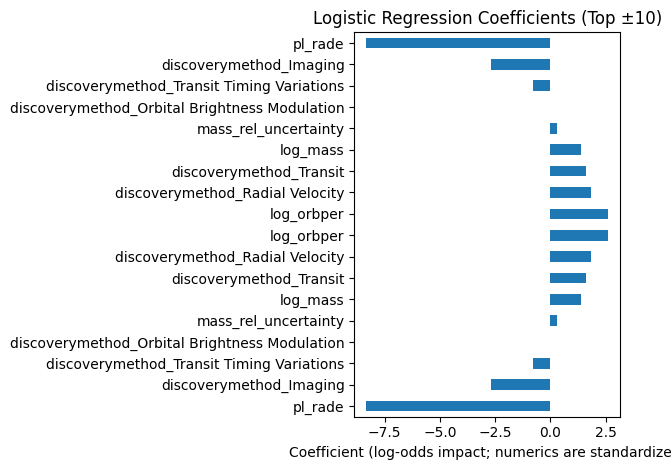

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_feature_names_from_pipe(pipe, X_sample):
    """Extract post-preprocessing feature names from a sklearn Pipeline with a ColumnTransformer step named 'prep'."""
    prep = pipe.named_steps['prep']
    num_cols = []
    cat_cols = []

    # Recover columns from the ColumnTransformer as you defined them
    for name, transformer, cols in prep.transformers_:
        if name == 'num':
            num_cols = list(cols)
        elif name == 'cat':
            cat_cols = list(cols)

    feature_names = []
    feature_names += num_cols

    if cat_cols:
        ohe = prep.named_transformers_['cat']
        ohe_names = list(ohe.get_feature_names_out(cat_cols))
        feature_names += ohe_names

    return feature_names

def plot_logreg_coefficients(pipe, X_sample, top_n=12):
    model = pipe.named_steps['model']
    coefs = model.coef_[0]

    feature_names = get_feature_names_from_pipe(pipe, X_sample)
    coef_s = pd.Series(coefs, index=feature_names)

    # Select top positive and negative coefficients
    top_pos = coef_s.sort_values(ascending=False).head(top_n)
    top_neg = coef_s.sort_values(ascending=True).head(top_n)

    plot_s = pd.concat([top_neg, top_pos])

    plt.figure()
    plot_s.plot(kind='barh')
    plt.title(f"Logistic Regression Coefficients (Top ±{top_n})")
    plt.xlabel("Coefficient (log-odds impact; numerics are standardized)")
    plt.tight_layout()
    plt.show()

plot_logreg_coefficients(pipe, X_test, top_n=10)

## Permutation importance (model-agnostic importance)

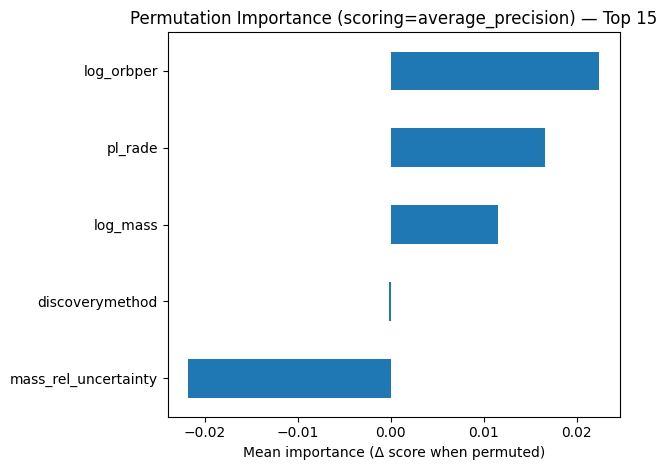

In [24]:
from sklearn.inspection import permutation_importance

def plot_permutation_importance(pipe, X, y, metric='average_precision', n_repeats=10, top_n=15, random_state=42):
    r = permutation_importance(
        pipe, X, y,
        n_repeats=n_repeats,
        random_state=random_state,
        scoring=metric
    )
    imp = pd.Series(r.importances_mean, index=X.columns).sort_values(ascending=False).head(top_n)

    plt.figure()
    imp.sort_values().plot(kind='barh')
    plt.title(f"Permutation Importance (scoring={metric}) — Top {top_n}")
    plt.xlabel("Mean importance (Δ score when permuted)")
    plt.tight_layout()
    plt.show()

# Uses raw feature columns (pre-one-hot), so it's easier to interpret
plot_permutation_importance(pipe, X_test, y_test, metric='average_precision', top_n=15)

## ROC + Precision-Recall curves

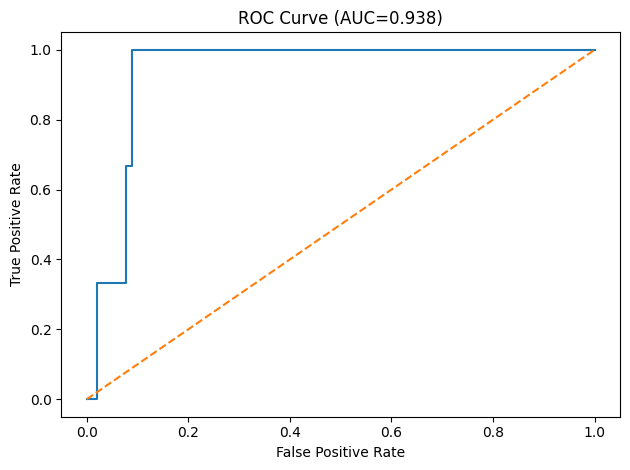

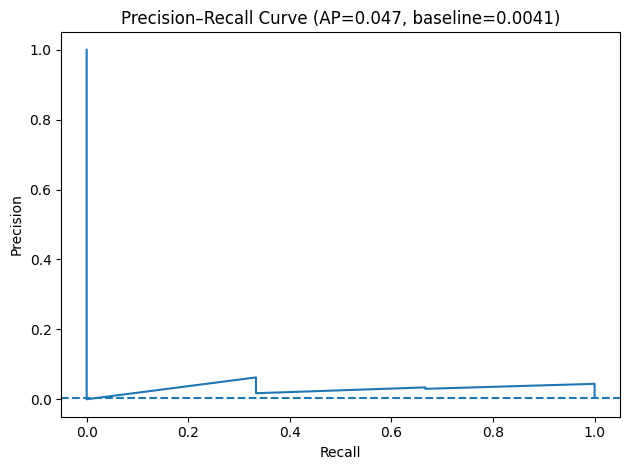

In [25]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score

def plot_roc_pr(y_true, proba):
    # ROC
    fpr, tpr, _ = roc_curve(y_true, proba)
    roc_auc = roc_auc_score(y_true, proba)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.title(f"ROC Curve (AUC={roc_auc:.3f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.tight_layout()
    plt.show()

    # PR
    precision, recall, _ = precision_recall_curve(y_true, proba)
    ap = average_precision_score(y_true, proba)
    baseline = np.mean(y_true)

    plt.figure()
    plt.plot(recall, precision)
    plt.axhline(baseline, linestyle='--')
    plt.title(f"Precision–Recall Curve (AP={ap:.3f}, baseline={baseline:.4f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.tight_layout()
    plt.show()

plot_roc_pr(y_test, proba)

## Calibration curve

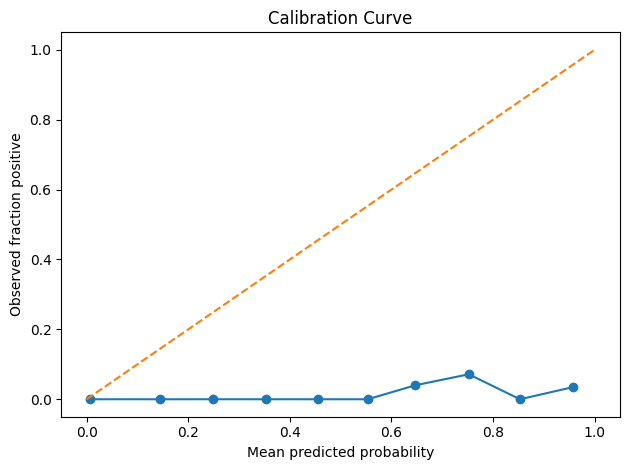

In [26]:
from sklearn.calibration import calibration_curve

def plot_calibration(y_true, proba, n_bins=10):
    frac_pos, mean_pred = calibration_curve(y_true, proba, n_bins=n_bins)

    plt.figure()
    plt.plot(mean_pred, frac_pos, marker='o')
    plt.plot([0,1],[0,1], linestyle='--')
    plt.title("Calibration Curve")
    plt.xlabel("Mean predicted probability")
    plt.ylabel("Observed fraction positive")
    plt.tight_layout()
    plt.show()

plot_calibration(y_test, proba, n_bins=10)

## Feature distributions split by controversy (interpretation plot)

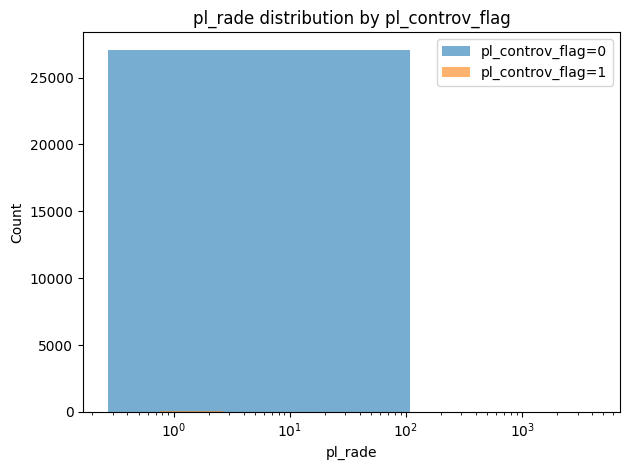

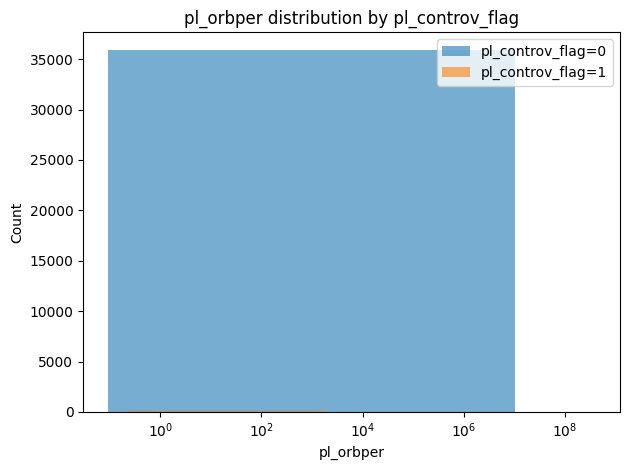

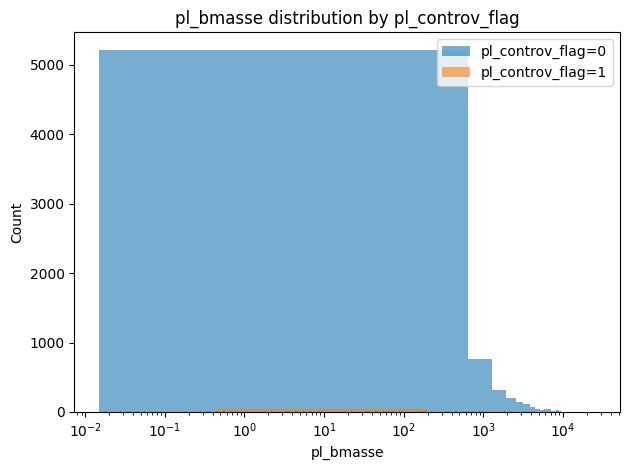

In [27]:
 def plot_feature_by_target(df_source, feature, target='pl_controv_flag', logx=False):
    sub = df_source[[feature, target]].dropna()
    a = sub[sub[target] == 0][feature]
    b = sub[sub[target] == 1][feature]

    plt.figure()
    plt.hist(a, bins=40, alpha=0.6, label=f"{target}=0")
    plt.hist(b, bins=40, alpha=0.6, label=f"{target}=1")
    if logx:
        plt.xscale("log")
    plt.title(f"{feature} distribution by {target}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Examples (adjust if you used engineered columns elsewhere)
plot_feature_by_target(df, 'pl_rade', logx=True)
plot_feature_by_target(df, 'pl_orbper', logx=True)
plot_feature_by_target(df, 'pl_bmasse', logx=True)

### Distributional Analysis of Physical Parameters by Controversy Flag

To investigate whether planetary physical characteristics differ between controversial and non-controversial detections, we examined the distributions of planet radius, planet mass, and orbital period across the two classes.

Due to the extreme class imbalance (~0.4% controversial), raw count histograms visually underrepresent the minority class. Therefore, interpretation focuses on distributional overlap rather than absolute frequency.

Planet Radius (pl_rade):
The radius distributions largely overlap between controversial and non-controversial planets, suggesting that planet size alone does not strongly differentiate controversial detections.

Planet Mass (pl_bmasse):
Mass shows comparatively more spread among controversial planets, particularly across mid-to-high mass ranges. This may reflect the higher uncertainty associated with mass estimation, especially for radial velocity detections where inclination assumptions and signal noise influence inferred values.

Orbital Period (pl_orbper):
Orbital period distributions overlap almost entirely between classes. This aligns with the fact that orbital period is typically one of the most precisely measured exoplanet parameters.

Overall, these results suggest that physical parameters alone do not strongly explain controversy status. Controversy may instead arise from measurement uncertainty, detection methodology, or follow-up validation issues rather than intrinsic planetary characteristics.